In [244]:
import pandas as pd 
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter

In [245]:
df = pd.read_excel("Data for Task 1.xlsx")

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [247]:
df.shape

(100, 52)

In [248]:
df.head(5)

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,1,488799101,6,8872,0,0-0310,T03.0354,US,13,FE9,FTB,130,FREG,NaN,370.03,370.03,61.46,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,287827.0,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,1,557444215,5,16346,0,0-0310,T03.0354,US,48,FE9,FTB,2400,FREG,NaN,307.32,307.32,291.14,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,17749294.0,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,SHT,US,CrossRoads Dealership,SAN DIEGO,11-46466/119152,Quantum Car Traders,SAN DIEGO,CA,1,921083521,9,8887,0,0-0310,T00.0006,US,12,YF5,FF6,130,FREG,NaN,2457.45,3205.45,1012.67,EN0,NONE,MF1,NONE,NaN,NaN,NaN,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,NaN,MX,Westwood Wheels,MILWAUKEE,13-47099/113361,Summit Drive Auto,SLINGER,WI,1,530869027,10,15500,0,0-0890,T06.2375,US,13,FE9,FTB,130,FREG,NaN,445.28,445.28,63.18,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2210821MFYX0482,287827.0,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,LuxeAuto Sales,KELLOGG,11-47556/116725,Horizon Motors,LIBERTY LAKE,WA,1,990197623,0,8,0,0-0621,T06.2375,US,48,NE1,FUC,130,FREG,NaN,1439.65,1439.65,136.00,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2212994MGPX0790,17749294.0,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [249]:
pd.set_option('display.max_columns', None) 

In [250]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,1,488799101,6,8872,0,0-0310,T03.0354,US,13,FE9,FTB,130,FREG,NaN,370.03,370.03,61.46,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,287827.0,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,1,557444215,5,16346,0,0-0310,T03.0354,US,48,FE9,FTB,2400,FREG,NaN,307.32,307.32,291.14,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,17749294.0,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,SHT,US,CrossRoads Dealership,SAN DIEGO,11-46466/119152,Quantum Car Traders,SAN DIEGO,CA,1,921083521,9,8887,0,0-0310,T00.0006,US,12,YF5,FF6,130,FREG,NaN,2457.45,3205.45,1012.67,EN0,NONE,MF1,NONE,NaN,NaN,NaN,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,NaN,MX,Westwood Wheels,MILWAUKEE,13-47099/113361,Summit Drive Auto,SLINGER,WI,1,530869027,10,15500,0,0-0890,T06.2375,US,13,FE9,FTB,130,FREG,NaN,445.28,445.28,63.18,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2210821MFYX0482,287827.0,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,LuxeAuto Sales,KELLOGG,11-47556/116725,Horizon Motors,LIBERTY LAKE,WA,1,990197623,0,8,0,0-0621,T06.2375,US,48,NE1,FUC,130,FREG,NaN,1439.65,1439.65,136.00,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2212994MGPX0790,17749294.0,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,SHT,US,Met

In [251]:
df.isnull().sum()### here we can see the null values in each columns

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

In [252]:
df = df.drop(columns=['CAMPAIGN_NBR'])#### this column contains 100% null values so i dropped this feature.

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [254]:
## I dropped these rows where these 4 features conatains NULL values, Even when we replace with mode it doesnt add any information.
df = df.dropna(subset=['ENGINE_SOURCE_PLANT','ENGINE_TRACE_NBR','TRANSMISSION_SOURCE_PLANT','TRANSMISSION_TRACE_NBR'])


In [255]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,1,488799101,6,8872,0,0-0310,T03.0354,US,13,FE9,FTB,130,FREG,370.03,370.03,61.46,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,287827.0,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,1,557444215,5,16346,0,0-0310,T03.0354,US,48,FE9,FTB,2400,FREG,307.32,307.32,291.14,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,17749294.0,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,NaN,MX,Westwood Wheels,MILWAUKEE,13-47099/113361,Summit Drive Auto,SLINGER,WI,1,530869027,10,15500,0,0-0890,T06.2375,US,13,FE9,FTB,130,FREG,445.28,445.28,63.18,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2210821MFYX0482,287827.0,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,LuxeAuto Sales,KELLOGG,11-47556/116725,Horizon Motors,LIBERTY LAKE,WA,1,990197623,0,8,0,0-0621,T06.2375,US,48,NE1,FUC,130,FREG,1439.65,1439.65,136.00,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2212994MGPX0790,17749294.0,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
5,3HRFFHED7RH167541,13026,Remove and replace steering wheel wire harness,Horn and steering wheel switches are inoperable,2024-01-05,HARNESS ASM-STRG WHL HORN SW WRG,Steering Wheel Horn Switch Wiring Harness Repl...,Full-Size Trucks,Crew Cab,T1CGF,SIL,MX,Horizon Motors,OMAHA,13-05637/165732,Prestige Wheels,COLUMBUS,NE,1,686012808,0,14,0,0-0890,T05.3330,US,48,FE9,FTB,20,FREG,216.75,216.75,139.84,L84,"GAS, 8 CYL, 5.3L, V8, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",812040194,A2212084MGSX0089,287827.0,S2212992CKJX2842,2809498122,6,1,N,TF10543,1500,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,3HRS9EED0LH255650,13041,REPLACED APPLIQUE,CUSTOMER STATES THE FINISH ON THE STEERING WHE...,2024-02-07,APPLIQUE ASM-STRG WHL TR SPOKE CVR *SYNTHESIS,St

In [256]:
df.isnull().sum()

VIN                               0
TRANSACTION_ID                    0
CORRECTION_VERBATIM               0
CUSTOMER_VERBATIM                 0
REPAIR_DATE                       0
CAUSAL_PART_NM                    5
GLOBAL_LABOR_CODE_DESCRIPTION     0
PLATFORM                          0
BODY_STYLE                        0
VPPC                              0
PLANT                             1
BUILD_COUNTRY                     0
LAST_KNOWN_DLR_NAME               0
LAST_KNOWN_DLR_CITY               0
REPAIRING_DEALER_CODE             0
DEALER_NAME                       0
REPAIR_DLR_CITY                   0
STATE                             2
DEALER_REGION                     0
REPAIR_DLR_POSTAL_CD              2
REPAIR_AGE                        0
KM                                0
COMPLAINT_CD_CSI                  0
COMPLAINT_CD                      0
VEH_TEST_GRP                      2
COUNTRY_SALE_ISO                  0
ORD_SELLING_SRC_CD                0
OPTN_FAMLY_CERTIFICATION    

In [257]:
df.shape

(88, 51)

In [258]:
### These categerical columns contains null values, i replaced these coulmns with mode.
columns_to_fill = ['PLANT', 'STATE', 'REPAIR_DLR_POSTAL_CD','CAUSAL_PART_NM','VEH_TEST_GRP','LAST_KNOWN_DELVRY_TYPE_CD','OPTN_FAMLY_CERTIFICATION','OPTF_FAMLY_EMISSIOF_SYSTEM']  # Add more as needed

# Fill each column with its mode
for col in columns_to_fill:
    mode_val = df[col].mode(dropna=True)[0]  # Get the most frequent value
    df[col] = df[col].fillna(mode_val)


In [259]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,1,488799101,6,8872,0,0-0310,T03.0354,US,13,FE9,FTB,130,FREG,370.03,370.03,61.46,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,287827.0,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,1,557444215,5,16346,0,0-0310,T03.0354,US,48,FE9,FTB,2400,FREG,307.32,307.32,291.14,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,17749294.0,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Westwood Wheels,MILWAUKEE,13-47099/113361,Summit Drive Auto,SLINGER,WI,1,530869027,10,15500,0,0-0890,T06.2375,US,13,FE9,FTB,130,FREG,445.28,445.28,63.18,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2210821MFYX0482,287827.0,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,LuxeAuto Sales,KELLOGG,11-47556/116725,Horizon Motors,LIBERTY LAKE,WA,1,990197623,0,8,0,0-0621,T06.2375,US,48,NE1,FUC,130,FREG,1439.65,1439.65,136.00,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2212994MGPX0790,17749294.0,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
5,3HRFFHED7RH167541,13026,Remove and replace steering wheel wire harness,Horn and steering wheel switches are inoperable,2024-01-05,HARNESS ASM-STRG WHL HORN SW WRG,Steering Wheel Horn Switch Wiring Harness Repl...,Full-Size Trucks,Crew Cab,T1CGF,SIL,MX,Horizon Motors,OMAHA,13-05637/165732,Prestige Wheels,COLUMBUS,NE,1,686012808,0,14,0,0-0890,T05.3330,US,48,FE9,FTB,20,FREG,216.75,216.75,139.84,L84,"GAS, 8 CYL, 5.3L, V8, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",812040194,A2212084MGSX0089,287827.0,S2212992CKJX2842,2809498122,6,1,N,TF10543,1500,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,3HRS9EED0LH255650,13041,REPLACED APPLIQUE,CUSTOMER STATES THE FINISH ON THE STEERING WHE...,2024-02-07,APPLIQUE ASM-STRG WHL TR SPOKE CVR *SYNTHESIS,St

In [260]:
df.isnull().sum()

VIN                              0
TRANSACTION_ID                   0
CORRECTION_VERBATIM              0
CUSTOMER_VERBATIM                0
REPAIR_DATE                      0
CAUSAL_PART_NM                   0
GLOBAL_LABOR_CODE_DESCRIPTION    0
PLATFORM                         0
BODY_STYLE                       0
VPPC                             0
PLANT                            0
BUILD_COUNTRY                    0
LAST_KNOWN_DLR_NAME              0
LAST_KNOWN_DLR_CITY              0
REPAIRING_DEALER_CODE            0
DEALER_NAME                      0
REPAIR_DLR_CITY                  0
STATE                            0
DEALER_REGION                    0
REPAIR_DLR_POSTAL_CD             0
REPAIR_AGE                       0
KM                               0
COMPLAINT_CD_CSI                 0
COMPLAINT_CD                     0
VEH_TEST_GRP                     0
COUNTRY_SALE_ISO                 0
ORD_SELLING_SRC_CD               0
OPTN_FAMLY_CERTIFICATION         0
OPTF_FAMLY_EMISSIOF_

In [261]:
df.head(5)

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,1,488799101,6,8872,0,0-0310,T03.0354,US,13,FE9,FTB,130,FREG,370.03,370.03,61.46,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,287827.0,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,1,557444215,5,16346,0,0-0310,T03.0354,US,48,FE9,FTB,2400,FREG,307.32,307.32,291.14,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,17749294.0,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Westwood Wheels,MILWAUKEE,13-47099/113361,Summit Drive Auto,SLINGER,WI,1,530869027,10,15500,0,0-0890,T06.2375,US,13,FE9,FTB,130,FREG,445.28,445.28,63.18,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2210821MFYX0482,287827.0,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,LuxeAuto Sales,KELLOGG,11-47556/116725,Horizon Motors,LIBERTY LAKE,WA,1,990197623,0,8,0,0-0621,T06.2375,US,48,NE1,FUC,130,FREG,1439.65,1439.65,136.00,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2212994MGPX0790,17749294.0,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
5,3HRFFHED7RH167541,13026,Remove and replace steering wheel wire harness,Horn and steering wheel switches are inoperable,2024-01-05,HARNESS ASM-STRG WHL HORN SW WRG,Steering Wheel Horn Switch Wiring Harness Repl...,Full-Size Trucks,Crew Cab,T1CGF,SIL,MX,Horizon Motors,OMAHA,13-05637/165732,Prestige Wheels,COLUMBUS,NE,1,686012808,0,14,0,0-0890,T05.3330,US,48,FE9,FTB,20,FREG,216.75,216.75,139.84,L84,"GAS, 8 CYL, 5.3L, V8, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",812040194,A2212084MGSX0089,287827.0,S2212992CKJX2842,2809498122,6,1,N,TF10543,1500,16.0,0,1


In [262]:
# Define the text columns to clean
text_cols = ['CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'CAUSAL_PART_NM']

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ''
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove punctuation/numbers
    words = word_tokenize(text)  # Tokenize
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)

# Apply cleaning function
for col in text_cols:
    df[col] = df[col].apply(clean_text)

# Preview cleaned text
df[text_cols].head()


,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,CAUSAL_PART_NM
0,replaced steering wheel okay,steering wheel coming apart,wheel asmstrg jet black
1,checked found dtcs u0229 u1530 set bcm found p...,customer states heated steering wheel inop,module asmstrg whl ht cont
3,steering wheel replacement,customer states lettering finish steering whee...,wheel asmstrg jet black
4,replaced steering message longer displayed,cs customer states service driver assist syste...,wheel asmstrg jet black
5,remove replace steering wheel wire harness,horn steering wheel switches inoperable,harness asmstrg whl horn sw wrg


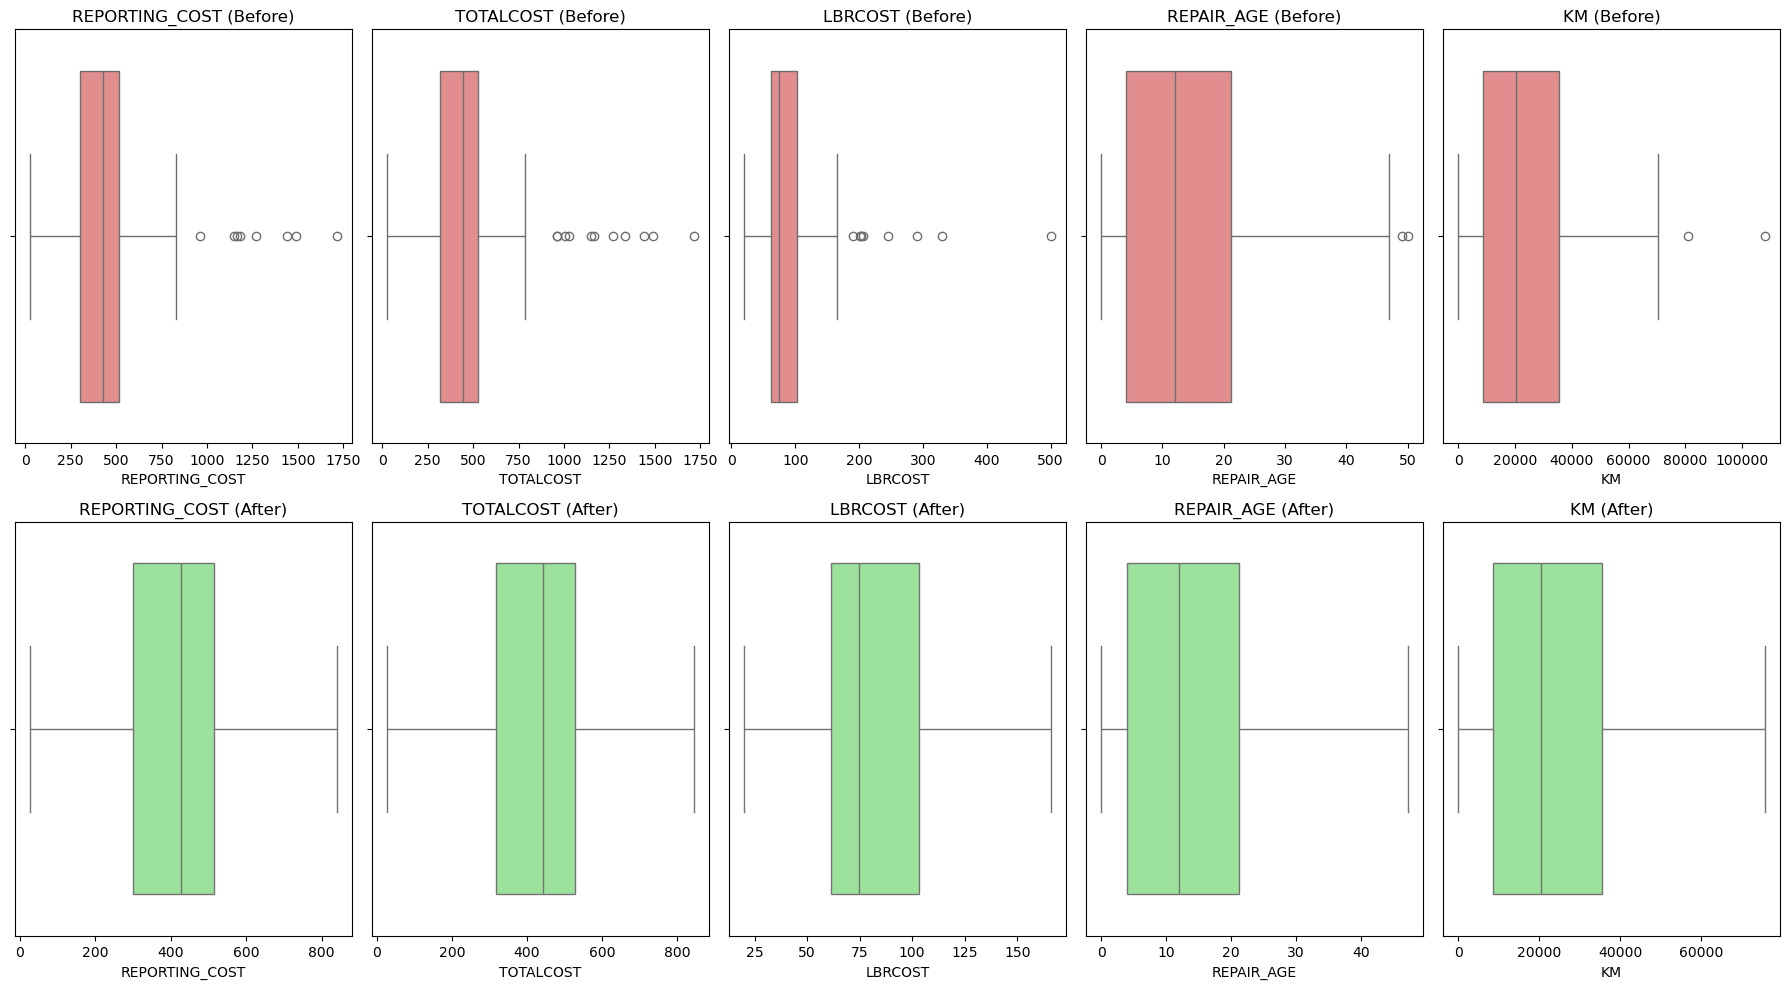

In [263]:
##Here i checked the outliers and fill the outliers with IQR values.
# Columns to process
num_cols = ['REPORTING_COST', 'TOTALCOST', 'LBRCOST', 'REPAIR_AGE', 'KM']

# Keep a copy of original data for comparison
df_before = df[num_cols].copy()

# Function to replace outliers using IQR
def replace_outliers_with_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace with nearest bound
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df

# Apply to each column
df_after = df[num_cols].copy()
for col in num_cols:
    df_after = replace_outliers_with_iqr(df_after, col)

# Plotting Before and After
fig, axes = plt.subplots(nrows=2, ncols=len(num_cols), figsize=(18, 10))
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_before, x=col, ax=axes[0, i], color='lightcoral')
    axes[0, i].set_title(f"{col} (Before)")
    sns.boxplot(data=df_after, x=col, ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f"{col} (After)")

plt.tight_layout()
plt.show()


In [264]:
# Step 1: Drop the original versions of these 5 columns from df
df = df.drop(columns=num_cols)

# Step 2: Add the cleaned versions from df_after to df
df = pd.concat([df, df_after[num_cols]], axis=1)

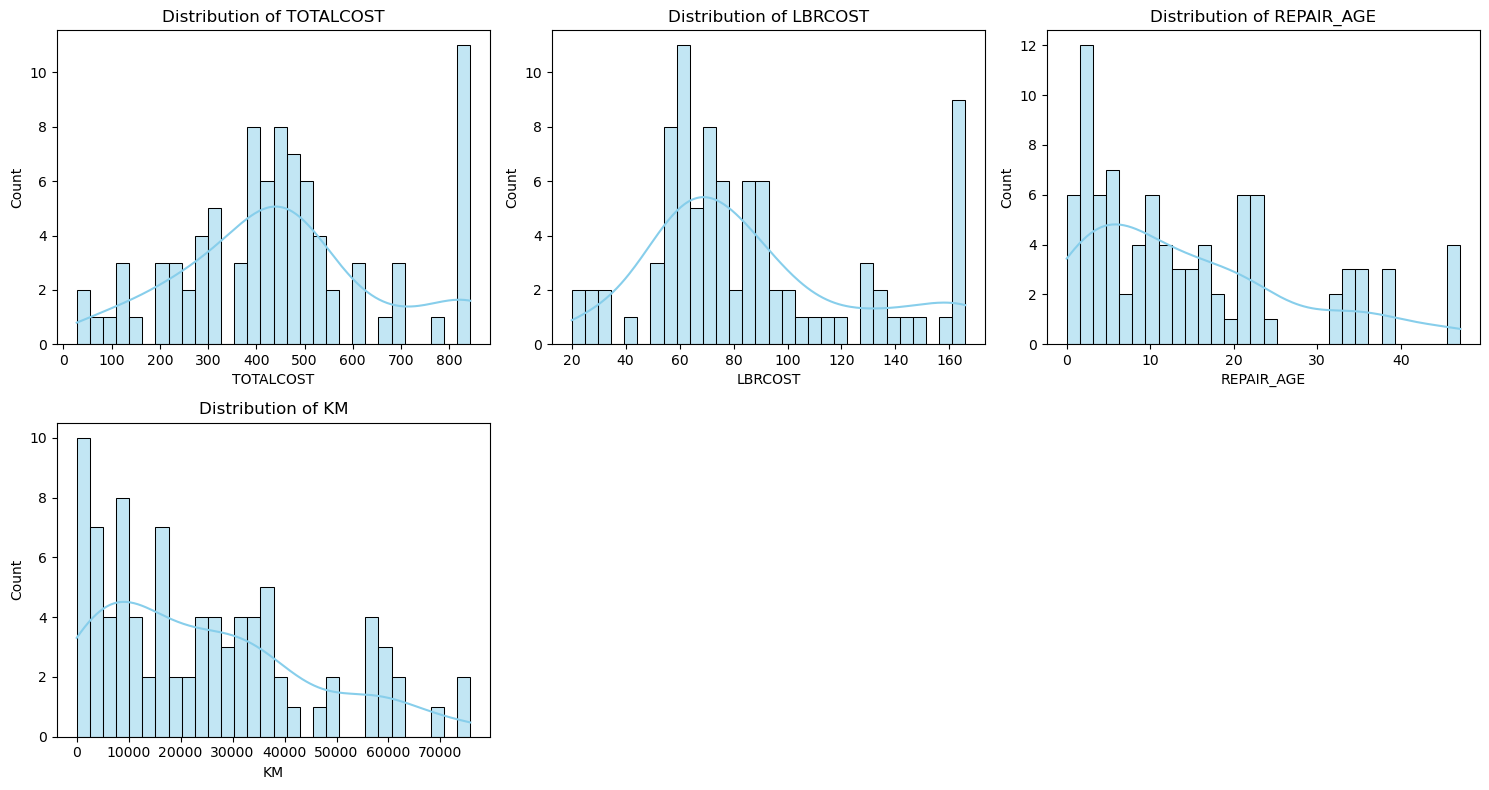

In [265]:
### here you can see differernt plots on these selected columns.
# Select relevant columns
selected_cols = ['TOTALCOST', 'LBRCOST', 'REPAIR_AGE', 'KM']

# Optional: Fill missing values (if any) with median for safe plotting
df[selected_cols] = df[selected_cols].fillna(df[selected_cols].median())

# 1. Histogram Plot
plt.figure(figsize=(15, 8))
for i, col in enumerate(selected_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


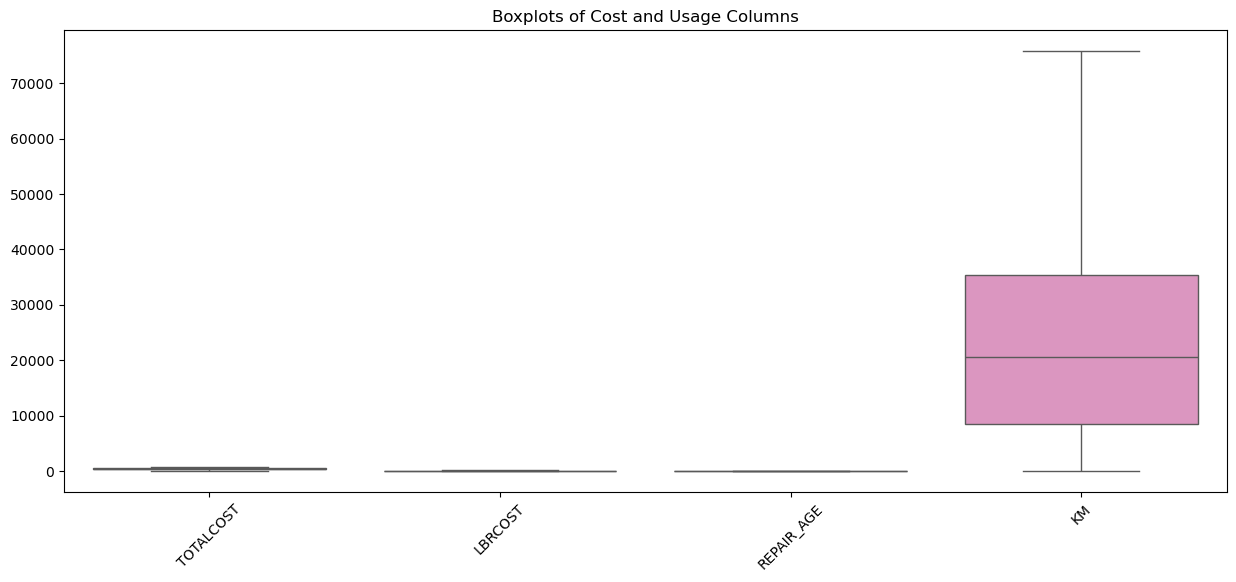

In [266]:
# 2. Boxplot Comparison
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[selected_cols], palette="Set2")
plt.title('Boxplots of Cost and Usage Columns')
plt.xticks(rotation=45)
plt.show()

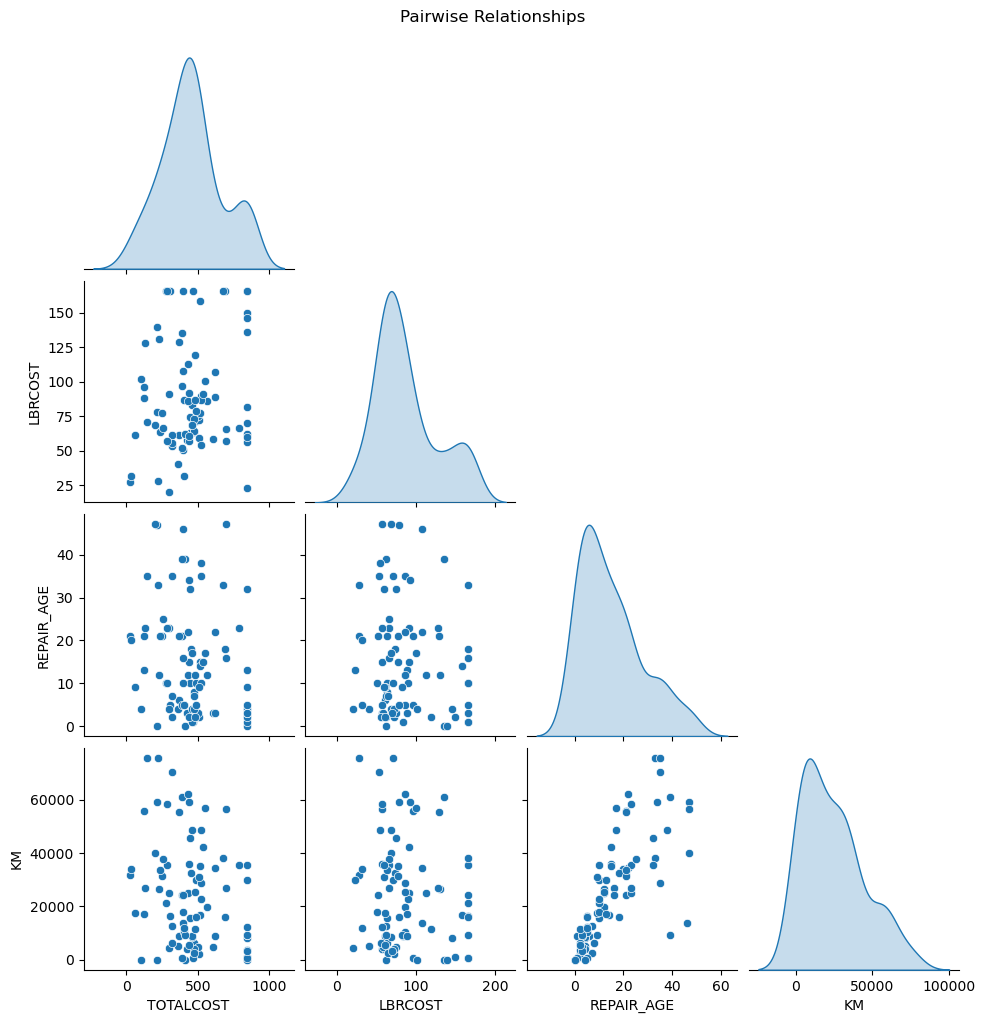

In [267]:
# 3. Pairplot
sns.pairplot(df[selected_cols], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [268]:

# Define free-text columns
text_cols = ['CUSTOMER_VERBATIM', 'CORRECTION_VERBATIM', 'CAUSAL_PART_NM']

# Combine all text columns into one
df['combined_text'] = df[text_cols].fillna('').agg(' '.join, axis=1)

# Define stopwords
stop_words = set(stopwords.words('english'))

# Clean and tokenize text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words and len(word) > 2]

# Apply to all rows
df['tokens'] = df['combined_text'].apply(clean_text)

# Flatten all tokens into one list
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Count most common keywords
tag_counts = Counter(all_tokens).most_common(30)

# Display top 30 tags
tags_df = pd.DataFrame(tag_counts, columns=['Tag', 'Frequency'])
print(tags_df)


            Tag  Frequency
0         wheel        269
1      steering        193
2       asmstrg         82
3         black         62
4      customer         53
5        states         52
6           jet         50
7      replaced         47
8        coming         25
9        heated         23
10        found         22
11      replace         21
12          sop         20
13          pra         18
14          whl         17
15      removed         17
16        apart         16
17         horn         15
18         trim         14
19        loose         14
20        spoke         13
21      leather         13
22       module         12
23  replacement         12
24          new         11
25         part         11
26      concern         11
27        check         11
28    stitching         11
29      harness         10


In [269]:
df.to_csv("task1.csv", index=False)